# 16: AI

- AI与Deep Learning
- Deep Learning Visualization
- 手写数字识别的案例（mnist datasets）
- AI and Data Scientist Roadmap

## AI与Deep Learning

![机器学习技术图](./img/2023-11-11-09-28-22.png)

### The Bitter Lesson

70年的人工智能研究中最大的教训:

- 能够更好地利用计算能力的通用方法最有效的，而且效果相差巨大。
- 而基于特定领域内的人类知识的方法由于往往不够通用，计算方法复杂，不能够充分利用计算能力使得它们远远落后于通用的方法。

## Deep Learning Visualization

神经网络的例子

![神经网络的例子](./img/2023-11-11-09-33-49.png)

神经元

神经元使用了一种叫感知机（perception）的算法，感知机算法接收上一层的作为输入，对输入进行计算后得到得结果如果超过了阈值，那么就输出1，否则输出0。


![神经元](./img/2023-11-11-09-36-24.png)

神经元输出的计算公式

- `b`被称为`bias`（偏置），用于控制神经元被激活的容易程度
- `w`被称为`weight`（权重），用于控制输入信号的权重
- `h()`被称作`activation function`（激活函数），用于控制神经元的输出

$a = b + w_1x_1 + w_2x_2$

$y = h(a)$

![计算过程](./img/2023-11-11-09-40-18.png)

打开这个网址可视化Deep Learning Network: [Tensorflow Playground](https://playground.tensorflow.org/)

![Tensorflow Playground Screen](./img/2023-11-08-17-55-49.png)

常见的激活函数：

- sigmoid（早期常用的）
- ReLU（现在更常用的）

sigmoid函数的公式：

$h(x) = \frac{1}{1 + e^{-x}}$

In [1]:
# sigmoid函数的实现
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

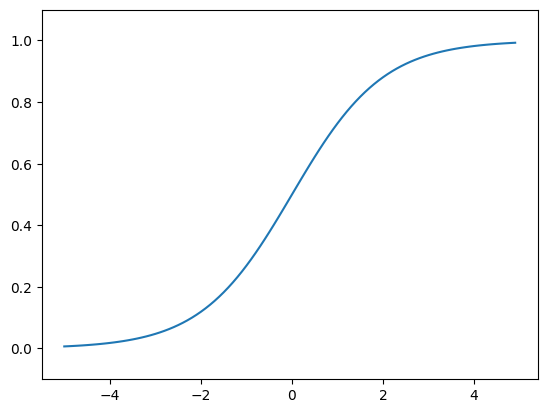

In [2]:
# sigmoid函数的可视化

import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

ReLU函数的公式：

$h(x) = \begin{cases} x & (x > 0) \\ 0 & (x \leq 0) \end{cases}$

In [3]:
# ReLU函数的实现
import numpy as np

def relu(x):
    return np.maximum(0, x)

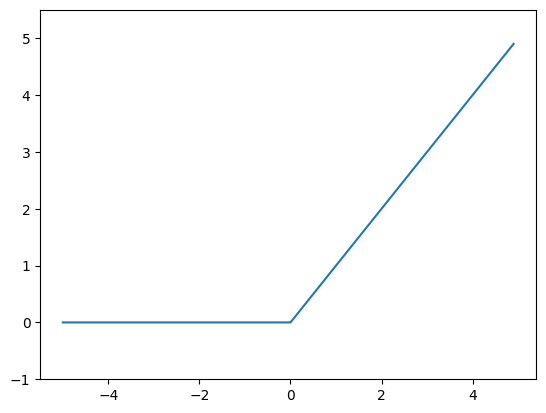

In [4]:
# ReLU函数的可视化
import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5) # 指定y轴的范围
plt.show()

## 手写数字识别的案例（mnist dataset）

什么是mnist dataset？

mnist dataset是一个手写数字的数据集，包含了60000个训练样本和10000个测试样本，每个样本都是一个28x28的灰度图像，每个像素点的值在0到255之间。

In [1]:
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

f = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
f.close()

training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [ ]:
# training_data是一个元组，第一个元素是一个50000*784的矩阵,
# 50000是样本数，784=28 * 28是每个样本的灰度像素的亮度
print(training_data[0].shape)

# 第二个元素是一个50000*1的向量，每个元素是一个0-9的数字，这个数字是人工标注的
print(training_data[1].shape)

(50000, 784)
(50000,)


In [4]:
# 第一个手写数字的二维矩阵
data1 = training_data[0][0].reshape(28, 28)
data1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

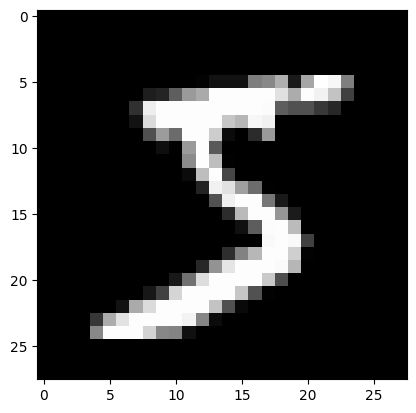

In [3]:
import matplotlib.pyplot as plt
plt.imshow(data1, cmap='gray')

### 随机梯度下降

先考虑只有一个输入的情况：

1. C(W)是损失函数，我们的目标是要使得得到的C(W)最小，W是输入数据的权重，W会决定的C(W)的值。
2. 让C(W)函数对W求导数，可以得到C(W)函数曲线的斜率
    2.1 斜率为正数时，C(W)函数正在随着W增加而增加。
    2.2 斜率为负数，C(W)函数正在随着W增加而减小。
3. 让W减去一个与斜率成比率的值，这个值就是梯度，这个比率就是学习率，可以使得C(W)函数趋向于局部的最小值。

![sgd](./img/2024-05-14-18-46-47.png)

当有两个权重值来计算输出时：

![2d sgd](./img/2024-05-14-19-01-56.png)

### 反向传播算法

手写数字识别的深度神经网络
- 从输入到输出，每层的单元数分别是：（784,16,16,10）
- 共有 13002 = 784*16 + 16*16 + 16*10 + 16 + 16 + 10个参数

![minst back propagation](./img/2024-05-15-10-17-29.png)

- 神经网络开始训练时的参数值的初始值是随机的，这时输入数据后得到的输出数据非常糟糕。
- 这时需要调整神经网络的参数值得到尽可能好的结果。

![begin to train](./img/2024-05-15-10-29-34.png)

- 通过计算最后一层的损失函数的梯度，我们可以知道在最后一层哪些参数应该增加，哪些参数减少，以及这些参数变化的程度。
- 最后一层的输入是前面一层的神经元计算输出得到的，这时我可以反向传播计算上一层的梯度，以此类推，一直反向传播到输入层，更新输入层的参数。

![back propagation](./img/2024-05-15-10-49-54.png)

### 手写数字识别的深度神经网络实现

In [1]:
import random
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print(f"Epoch {j} : {self.evaluate(test_data)} / {n_test}")
            else:
                print(f"Epoch {j} complete")

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives partial C_x
        partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [2]:
import pickle
import gzip
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [3]:
training_data, validation_data, test_data = load_data_wrapper()
training_data = list(training_data)

net = Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8345 / 10000
Epoch 1 : 8585 / 10000
Epoch 2 : 9261 / 10000
Epoch 3 : 9290 / 10000
Epoch 4 : 9355 / 10000
Epoch 5 : 9366 / 10000
Epoch 6 : 9376 / 10000
Epoch 7 : 9402 / 10000
Epoch 8 : 9440 / 10000
Epoch 9 : 9452 / 10000
Epoch 10 : 9455 / 10000
Epoch 11 : 9473 / 10000
Epoch 12 : 9460 / 10000
Epoch 13 : 9467 / 10000
Epoch 14 : 9468 / 10000
Epoch 15 : 9458 / 10000
Epoch 16 : 9486 / 10000
Epoch 17 : 9475 / 10000
Epoch 18 : 9496 / 10000
Epoch 19 : 9484 / 10000
Epoch 20 : 9480 / 10000
Epoch 21 : 9476 / 10000
Epoch 22 : 9499 / 10000
Epoch 23 : 9504 / 10000
Epoch 24 : 9466 / 10000
Epoch 25 : 9460 / 10000
Epoch 26 : 9487 / 10000
Epoch 27 : 9480 / 10000
Epoch 28 : 9466 / 10000
Epoch 29 : 9508 / 10000


## 深度神经网络的一些特点

1. 输入和输出的数据全部要转化成数字向量。
   
2. 输入数据的对应的预期输出数据通常是需要人工来标注的
   - 例如手写数字数据集每个手写数字由人标注的。
  
3. 和常规编程不同，我们不会去规定神经元具体做什么，每个神经元具体完成什么工作往往没有清晰的定义。
   
4. 神经网络的知识是从大量数据中学习到的，然后保存在了神经网络的权重值中。

## 手写数字识别深度神经网络的参考资料

[手写数字识别的深度神经网络的可视化](https://adamharley.com/nn_vis/)

3Blue1Brown关于神经网络的视频：

- B站：[神经网络的结构](https://www.bilibili.com/video/BV1bx411M7Zx/?vd_source=fcb244788c384f6ac111b4d9d46105e2)
- 官网：[神经网络的系列视频](https://www.3blue1brown.com/topics/neural-networks)